In [152]:
import os, sys
import json
import pandas as pd
import numpy as np
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.grid'] = True

clusters = [-1, 0, 1, 2, 3, 5, 6, 7]
algs = ['AR', 'ANN_AE', 'ANN_VAE', 'LSTM_AE', 'DeepLog', 'CondRealNVP']
beta = [1.00, 0.50, 0.25]
alpha = [0.05, 0.03, 0.01]

save_dir = './Inrix/results'

# Cluster-level anomaly detection performance

### Exp 1. Effectiveness Test

In [33]:
for c in clusters:
    recall_perf = {}
    f1_perf = {}
    for a in algs:
        recall_df = {}
        f1_df = {}
        for s in alpha:
            all_recall = []
            all_f1 = []
            for r in range(1, 6):
                with open('Inrix/logs/%s/run%d/OPTICS/%d/spat_0.50_slice_%.2f/cluster_perf.json' % (a, r, c, s)) as f:
                    p = json.load(f)
                    precision = p['precision']
                    recall = p['recall']
                    f1 = p['f1_score']
                all_recall.append(recall)
                all_f1.append(f1)
            recall_df['alpha=%.2f' % s] = np.mean(all_recall)
            f1_df['alpha=%.2f' % s] = np.mean(all_f1)
        recall_perf['%s'%a] = recall_df
        f1_perf['%s'%a] = f1_df
    recall_perf = pd.DataFrame(recall_perf).round(3).T
    f1_perf = pd.DataFrame(f1_perf).round(3).T
    os.system('mkdir -p %s/effectiveness/recall' % save_dir)
    os.system('mkdir -p %s/effectiveness/f1' % save_dir)
    recall_perf.to_csv('%s/effectiveness/recall/cluster%d.csv' % (save_dir, c))
    f1_perf.to_csv('%s/effectiveness/f1/cluster%d.csv' % (save_dir, c))

#### Compute Average Performance

In [34]:
for a in algs:
    print('Alg: %s-------------' % a)
    data = []
    for c in clusters:
        perf = pd.read_csv('Inrix/results/effectiveness/f1/cluster%d.csv'%c, index_col=0)
        data.append(perf.loc[a].values)
    data = pd.DataFrame(data, index=clusters, columns=alpha)
    data_mean = data.mean(axis=0).round(3)
    data_std = data.std(axis=0).round(3)
    print(list(zip(data_mean.values, data_std.values)))

Alg: AR-------------
[(0.446, 0.047), (0.401, 0.069), (0.292, 0.074)]
Alg: ANN_AE-------------
[(0.475, 0.124), (0.421, 0.144), (0.295, 0.14)]
Alg: ANN_VAE-------------
[(0.49, 0.122), (0.435, 0.139), (0.307, 0.131)]
Alg: LSTM_AE-------------
[(0.466, 0.105), (0.401, 0.127), (0.272, 0.119)]
Alg: DeepLog-------------
[(0.439, 0.048), (0.374, 0.076), (0.246, 0.079)]
Alg: CondRealNVP-------------
[(0.632, 0.146), (0.583, 0.168), (0.48, 0.169)]


### Exp 2. Sensitivity Test

In [35]:
for c in clusters:
    recall_perf = {}
    f1_perf = {}
    for a in algs:
        recall_df = {}
        f1_df = {}
        for b in beta:
            all_recall = []
            all_f1 = []
            for r in range(1, 6):
                with open('Inrix/logs/%s/run%d/OPTICS/%d/spat_%.2f_slice_0.05/cluster_perf.json' % (a, r, c, b)) as f:
                    p = json.load(f)
                    precision = p['precision']
                    recall = p['recall']
                    f1 = p['f1_score']
                all_recall.append(recall)
                all_f1.append(f1)
            recall_df['beta=%.2f' % b] = np.mean(all_recall)
            f1_df['beta=%.2f' % b] = np.mean(all_f1)
        recall_perf['%s'%a] = recall_df
        f1_perf['%s'%a] = f1_df
    recall_perf = pd.DataFrame(recall_perf).round(3).T
    f1_perf = pd.DataFrame(f1_perf).round(3).T
    os.system('mkdir -p %s/sensitivity/recall' % save_dir)
    os.system('mkdir -p %s/sensitivity/f1' % save_dir)
    recall_perf.to_csv('%s/sensitivity/recall/cluster%d.csv' % (save_dir, c))
    f1_perf.to_csv('%s/sensitivity/f1/cluster%d.csv' % (save_dir, c))

#### Compute Average Performance

In [38]:
for a in algs:
    print('Alg: %s-------------' % a)
    data = []
    for c in clusters:
        perf = pd.read_csv('Inrix/results/sensitivity/f1/cluster%d.csv'%c, index_col=0)
        data.append(perf.loc[a].values)
    data = pd.DataFrame(data, index=clusters, columns=beta)
    data_mean = data.mean(axis=0).round(3)
    data_std = data.std(axis=0).round(3)
    print(list(zip(data_mean.values, data_std.values)))

Alg: AR-------------
[(0.58, 0.037), (0.446, 0.047), (0.241, 0.058)]
Alg: ANN_AE-------------
[(0.516, 0.088), (0.475, 0.124), (0.369, 0.123)]
Alg: ANN_VAE-------------
[(0.541, 0.073), (0.49, 0.122), (0.37, 0.135)]
Alg: LSTM_AE-------------
[(0.519, 0.06), (0.466, 0.105), (0.342, 0.103)]
Alg: DeepLog-------------
[(0.53, 0.052), (0.439, 0.048), (0.288, 0.049)]
Alg: CondRealNVP-------------
[(0.575, 0.079), (0.632, 0.146), (0.484, 0.157)]


### Exp 3. Segment-level anomaly detection performance

In [41]:
for c in clusters:
    recall_perf = {}
    f1_perf = {}
    for a in algs:
        recall_df = {}
        f1_df = {}
        for b in beta:
            all_recall = []
            all_f1 = []
            for r in range(1, 6):
                # print('Inrix/logs/%s/run%d/OPTICS/%d/spat_%.2f_slice_0.05/seg_perf.json' % (a, r, c, b))
                with open('Inrix/logs/%s/run%d/OPTICS/%d/spat_%.2f_slice_0.05/seg_perf.json' % (a, r, c, b)) as f:
                    p = json.load(f)
                    precision = p['precision']
                    recall = p['recall']
                    f1 = p['f1_score']
                all_recall.append(recall)
                all_f1.append(f1)
            recall_df['beta=%.2f' % b] = np.mean(all_recall)
            f1_df['beta=%.2f' % b] = np.mean(all_f1)
        recall_perf['%s'%a] = recall_df
        f1_perf['%s'%a] = f1_df
    recall_perf = pd.DataFrame(recall_perf).round(3).T
    f1_perf = pd.DataFrame(f1_perf).round(3).T
    os.system('mkdir -p %s/diagnosis/recall' % save_dir)
    os.system('mkdir -p %s/diagnosis/f1' % save_dir)
    recall_perf.to_csv('%s/diagnosis/recall/cluster%d.csv' % (save_dir, c))
    f1_perf.to_csv('%s/diagnosis/f1/cluster%d.csv' % (save_dir, c))

#### Compute Average Performance

In [44]:
for a in algs:
    print('Alg: %s-------------' % a)
    data = []
    for c in clusters:
        perf = pd.read_csv('Inrix/results/diagnosis/f1/cluster%d.csv'%c, index_col=0)
        data.append(perf.loc[a].values)
    data = pd.DataFrame(data, index=clusters, columns=beta)
    data_mean = data.mean(axis=0).round(3)
    data_std = data.std(axis=0).round(3)
    print(list(zip(data_mean.values, data_std.values)))

Alg: AR-------------
[(0.57, 0.041), (0.341, 0.034), (0.178, 0.041)]
Alg: ANN_AE-------------
[(0.491, 0.091), (0.345, 0.072), (0.221, 0.061)]
Alg: ANN_VAE-------------
[(0.517, 0.069), (0.352, 0.068), (0.218, 0.068)]
Alg: LSTM_AE-------------
[(0.507, 0.066), (0.341, 0.065), (0.211, 0.05)]
Alg: DeepLog-------------
[(0.514, 0.06), (0.333, 0.038), (0.199, 0.035)]
Alg: CondRealNVP-------------
[(0.572, 0.077), (0.42, 0.092), (0.245, 0.075)]


#### Diagnosis Time

 2    44.738
 7    61.611
 3    43.946
 1    46.600
 6    10.218
 5    11.834
 0    52.391
-1     7.441
dtype: float64


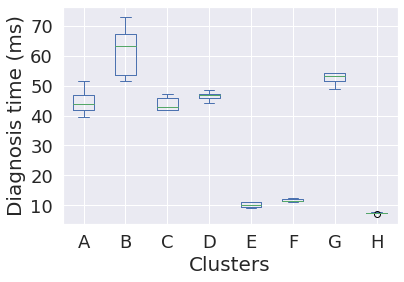

In [157]:
diag_time_perf = {}
clusters = [2,7,3,1,6,5,0,-1]
cluster_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

import seaborn as sns
sns.set(rc = {'figure.figsize':(6,4)})

for c in clusters:
    diag_time_df = {}
    for s in alpha[:1]:
        all_diag_time = []
        for r in range(1, 6):
            with open('Inrix/logs/CondRealNVP/run%d/OPTICS/%d/spat_0.50_slice_%.2f/seg_perf.json' % (r, c, s)) as f:
                p = json.load(f)
                avg_diag_time = p['avg_diag_time']
            all_diag_time.append(avg_diag_time)
        diag_time_df['alpha=%.2f' % s] = all_diag_time
    # print(pd.DataFrame(diag_time_df))
    diag_time_perf[c] = diag_time_df['alpha=%.2f' % s]

diag_time_perf = pd.DataFrame(diag_time_perf)*1000
print(diag_time_perf.mean(axis=0).round(3))
fig = diag_time_perf.plot(kind='box', fontsize=18)
plt.xticks(np.arange(1, 9), cluster_names)
fig.set_xlabel('Clusters', fontsize=20)
fig.set_ylabel('Diagnosis time (ms)', fontsize=20)
plt.savefig('diag_time.png', dpi=400)
# diag_time_perf = 100*pd.DataFrame(diag_time_perf).mean(axis=0).T.round(3)
# os.system('mkdir -p %s/diagnosis/diag_time' % save_dir)
# diag_time_perf.to_csv('%s/diagnosis/diag_time/cluster%d.csv' % (save_dir, c))

# print(diag_time_perf.values)

### Supervised Classification

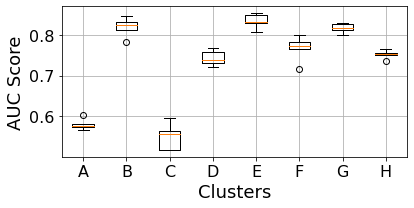

In [271]:
clusters = [2,7,3,1,6,5,0,-1]
cluster_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

results = {}
for i in range(5):
    all_auc = {}
    for c in clusters:
        auc = np.load('Inrix/logs/CondRealNVP/classifier/run%d/%d/auc.npy' % (i, c))
        all_auc[c] = auc
    all_auc = pd.DataFrame(all_auc)
    results[i] = all_auc.mean(0).values  # average over five synthetic testing datasets

results = pd.DataFrame(results).T
fig = plt.figure(figsize=(6, 3))
plt.boxplot(results)
plt.xlabel('Clusters', fontsize=18)
plt.xticks(np.arange(1, 9), cluster_names, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('AUC Score', fontsize=18)
plt.tight_layout()
plt.savefig('auc.png', dpi=400)